<a href="https://colab.research.google.com/github/alicepearse/DL_prac/blob/master/TF_linear_classification_practice_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Load the data
data = load_breast_cancer()

In [19]:
# Check the type of data
type(data)

sklearn.utils.Bunch

In [20]:
# Call keys
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
# Look at shape
data.data.shape

(569, 30)

In [25]:
# Print targets
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [26]:
# Check labels ie names
print(data.target_names)

['malignant' 'benign']


In [27]:
# Check target shape
data.target.shape

(569,)

In [29]:
# CHeck input feature names
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [31]:
# Split the data (test size 0.33)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

# Assign the shape of x_train to the variables N, D
N, D = X_train.shape

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# train the model
r = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100)


# Evaluate the model
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 39.0778 - accuracy: 0.6273 - val_loss: 32.0838 - val_accuracy: 0.6277
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 26.9453 - accuracy: 0.6273 - val_loss: 19.6684 - val_accuracy: 0.6277
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 14.1008 - accuracy: 0.6273 - val_loss: 7.5515 - val_accuracy: 0.6277
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 3.4004 - accuracy: 0.7270 - val_loss: 0.7010 - val_accuracy: 0.8404
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0781 - accuracy: 0.7638 - val_loss: 1.3896 - val_accuracy: 0.7021
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1538 - accuracy: 0.7664 - val_loss: 0.8319 - val_accuracy: 0.7926
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7682 - accuracy: 0.8136 - val_loss: 0.6714 - val_accuracy: 0.8511
Epoch 8

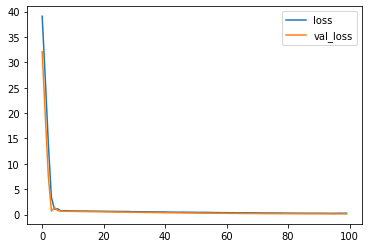

In [36]:
# Plot loss
plt.plot(r.history['loss'], label= "loss")
plt.plot(r.history['val_loss'], label= "val_loss")
plt.legend()

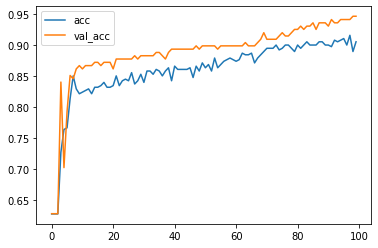

In [37]:
#  Plot accurarcy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [38]:
# Make predictions
P = model.predict(X_test)
print(P)

[[9.9953210e-01]
 [9.9252522e-01]
 [2.4309200e-05]
 [9.8974025e-01]
 [9.3076497e-01]
 [9.2106640e-01]
 [2.8184023e-01]
 [3.6857396e-02]
 [9.9937034e-01]
 [4.1246734e-05]
 [9.9979436e-01]
 [9.9951947e-01]
 [3.8200276e-19]
 [9.9523568e-01]
 [6.6574592e-07]
 [9.8988426e-01]
 [9.7564006e-01]
 [2.2256855e-21]
 [9.9827445e-01]
 [9.9922252e-01]
 [4.6277613e-09]
 [1.9731820e-03]
 [9.9964803e-01]
 [9.9583083e-01]
 [7.9056084e-02]
 [9.9984241e-01]
 [9.8550379e-01]
 [5.6678777e-13]
 [8.6639466e-11]
 [9.9805772e-01]
 [9.9773204e-01]
 [3.8256176e-09]
 [3.5433769e-03]
 [1.6435087e-03]
 [2.9640546e-10]
 [9.3995005e-01]
 [9.9372774e-01]
 [2.9041029e-14]
 [9.9159586e-01]
 [1.1731815e-06]
 [3.7568694e-01]
 [9.9945366e-01]
 [9.9802303e-01]
 [8.9982855e-01]
 [1.6802379e-09]
 [5.0432116e-01]
 [9.7539401e-01]
 [9.8164809e-01]
 [2.4082983e-01]
 [9.1365170e-01]
 [1.8670678e-02]
 [9.9894416e-01]
 [9.9995583e-01]
 [6.6133055e-08]
 [9.9799168e-01]
 [2.0506515e-10]
 [9.9888068e-01]
 [9.9256086e-01]
 [5.8743184e-1

In [39]:
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


In [40]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9468085106382979
6/6 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9468
Evaluate output: [0.14016015827655792, 0.9468085169792175]


In [41]:
model.save('linearclassifier.h5')

In [42]:
!ls -lh 

total 24K
-rw-r--r-- 1 root root  19K Sep  8 11:17 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Aug 27 16:39 sample_data


In [43]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1402 - accuracy: 0.9468


[0.14016015827655792, 0.9468085169792175]

In [44]:
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>